In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

names = ["date", "city", "state", "country", "shape", "duration_seconds", "duration_reported", "description", "report_date", "latitude", "longitude"]

ufo = pd.read_csv("data-readonly/ufo-scrubbed-geocoded-time-standardized.csv",
                 names = names, parse_dates = ["date", "report_date"])

ufo_dates = ufo.set_index("date")

ufo_dates["hour_of_day"] = ufo_dates.index.hour



In [4]:
which_hour = ufo_dates.groupby("hour_of_day")["duration_seconds"].count()
duration_by_hour = ufo_dates.groupby("hour_of_day")["duration_seconds"].sum()

In [5]:
duration_by_hour

hour_of_day
0     2.336747e+07
1     7.321914e+07
2     1.358630e+07
3     4.977840e+06
4     3.644581e+06
5     8.395434e+06
6     1.453030e+06
7     5.967030e+05
8     9.840235e+05
9     8.306253e+06
10    1.510430e+06
11    2.607532e+06
12    1.983128e+07
13    1.323662e+06
14    2.861558e+06
15    3.820363e+06
16    3.221071e+06
17    1.034460e+08
18    7.279388e+07
19    1.086671e+07
20    3.135144e+07
21    8.992292e+07
22    5.478192e+07
23    1.874752e+08
Name: duration_seconds, dtype: float64

In [6]:
duration_by_hour = ufo_dates.groupby(["state","hour_of_day"])["duration_seconds"].sum()

In [8]:
duration_by_hour.loc["ak",:]

state  hour_of_day
ak     0               30887.0
       1               74031.0
       2               10993.0
       3               11347.0
       4                1682.0
       5                2530.0
       6                4800.0
       7                 820.0
       8                5162.0
       9               19382.0
       10               1230.0
       11              17400.0
       12               2540.0
       13               3710.0
       14               8580.0
       15               1692.0
       16              17000.0
       17               2133.0
       18             612573.0
       19              14602.0
       20              20189.0
       21              60412.0
       22              53817.0
       23             520556.0
Name: duration_seconds, dtype: float64

In [10]:
duration_by_hour.loc["ab":"ak", 5:10]

state  hour_of_day
ab     5               4220.0
       6               5115.0
       7               1040.0
       8              16200.0
       9                 30.0
       10              2825.0
ak     5               2530.0
       6               4800.0
       7                820.0
       8               5162.0
       9              19382.0
       10              1230.0
Name: duration_seconds, dtype: float64

In [17]:
ufo_dates.index

DatetimeIndex(['1949-10-10 20:30:00', '1949-10-10 21:00:00',
               '1955-10-10 17:00:00', '1956-10-10 21:00:00',
               '1960-10-10 20:00:00', '1961-10-10 19:00:00',
               '1965-10-10 21:00:00', '1965-10-10 23:45:00',
               '1966-10-10 20:00:00', '1966-10-10 21:00:00',
               ...
               '2013-09-09 21:00:00', '2013-09-09 21:00:00',
               '2013-09-09 21:00:00', '2013-09-09 21:00:00',
               '2013-09-09 21:00:00', '2013-09-09 21:15:00',
               '2013-09-09 22:00:00', '2013-09-09 22:00:00',
               '2013-09-09 22:20:00', '2013-09-09 23:00:00'],
              dtype='datetime64[ns]', name='date', length=80332, freq=None)

In [23]:
ufo_dates.index.days_in_month

Int64Index([31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='date', length=80332)

In [24]:
ufo_dates.index.hour

Int64Index([20, 21, 17, 21, 20, 19, 21, 23, 20, 21,
            ...
            21, 21, 21, 21, 21, 21, 22, 22, 22, 23],
           dtype='int64', name='date', length=80332)

In [25]:
ufo_dates.index.minute

Int64Index([30,  0,  0,  0,  0,  0,  0, 45,  0,  0,
            ...
             0,  0,  0,  0,  0, 15,  0,  0, 20,  0],
           dtype='int64', name='date', length=80332)

In [31]:
duration_by_hour.sum()

493235482.85100001

In [33]:
duration_by_hour.loc["ak",:].sum()

1498068.0

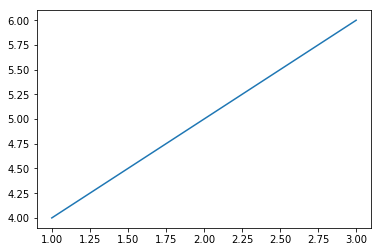

In [34]:
plt.plot( [ 1, 2, 3 ], [ 4, 5, 6 ])

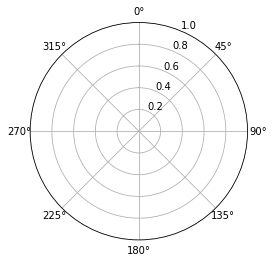

In [41]:
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

In [42]:
which_hour = ufo_dates.groupby("hour_of_day")["duration_seconds"].count()

Visualize the number of sightings as a function of the hour of the day, split up into AM and PM

In [43]:
which_hour.index > 11

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [44]:
which_hour.loc[:12]

hour_of_day
0     4108
1     3210
2     2357
3     2004
4     1529
5     1591
6     1224
7      905
8      803
9      958
10    1166
11    1144
12    1368
Name: duration_seconds, dtype: int64

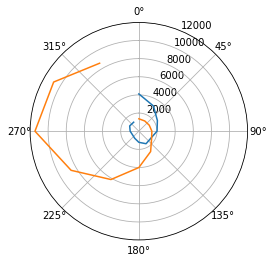

In [52]:
am_counts = which_hour.loc[:11]
pm_counts = which_hour.loc[12:]
pm_radians = pm_counts.index * 2*np.pi/12
am_radians = am_counts.index * 2*np.pi/12
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(am_radians, am_counts)
ax.plot(pm_radians, pm_counts)

In [47]:
which_hour.loc[12:]

hour_of_day
12     1368
13     1303
14     1322
15     1433
16     1620
17     2592
18     4002
19     6147
20     8617
21    11445
22    10837
23     8647
Name: duration_seconds, dtype: int64

In [82]:
plt.rcParams["figure.figsize"] = (10, 12)

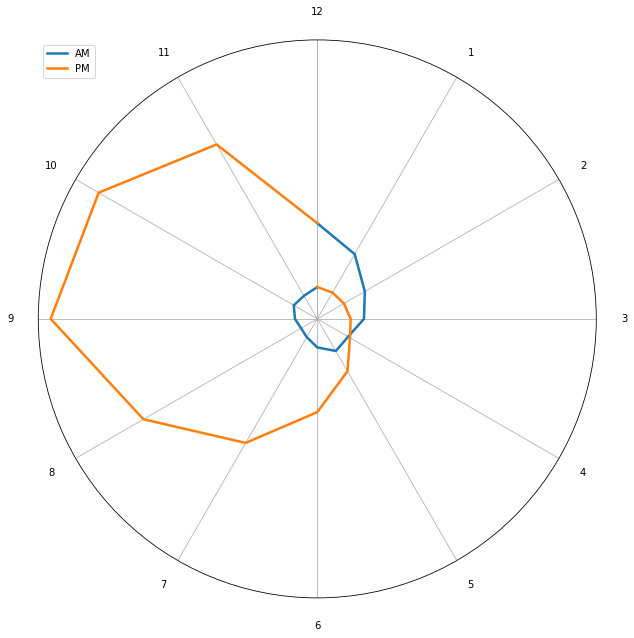

In [83]:

am_counts = which_hour.loc[:12]
pm_counts = which_hour.loc[12:].append(which_hour.loc[0:0])
pm_radians = pm_counts.index * 2*np.pi/12
am_radians = am_counts.index * 2*np.pi/12
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(am_radians, am_counts, label = 'AM', linewidth = 2.5)
ax.plot(pm_radians, pm_counts, label = 'PM', linewidth = 2.5)
ax.set_xticks(am_radians)
ax.set_xticklabels(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
ax.set_yticks([])
ax.legend(loc = 'upper left')

[]

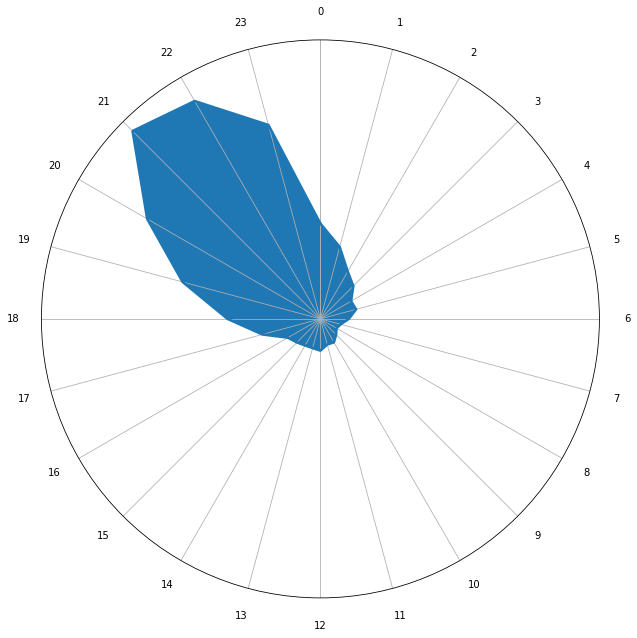

In [87]:
all_counts = which_hour.append(which_hour.loc[0:0])
all_radians = all_counts.index * 2*np.pi/24
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(all_radians, all_counts, linewidth = 2.5)
ax.fill_between(all_radians, np.zeros(all_counts.size), all_counts)
ax.set_xticks(all_radians)
ax.set_xticklabels([str(_) for _ in range(24)])
ax.set_yticks([])
#ax.legend(loc = 'upper left')

In [115]:
bystate = ufo_dates.groupby(["state", "hour_of_day"])["state"].count()

In [141]:
texas_counts = bystate.loc["tx",:]
illinois_counts = bystate.loc["il",:]

[]

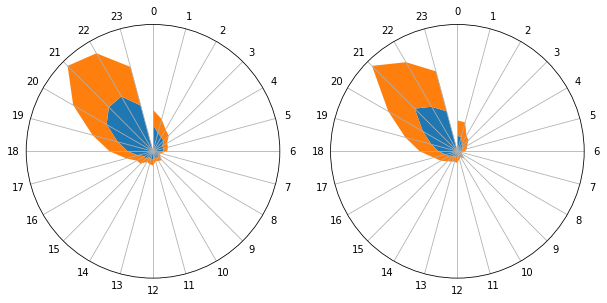

In [131]:
all_radians = np.arange(24) * 2*np.pi/24
ax = plt.subplot(121, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.stackplot(all_radians, texas_counts, illinois_counts)
ax.set_xticks(all_radians)
ax.set_xticklabels([str(_) for _ in range(24)])
ax.set_yticks([])

ax = plt.subplot(122, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.stackplot(all_radians, illinois_counts, illinois_counts)
ax.set_xticks(all_radians)
ax.set_xticklabels([str(_) for _ in range(24)])
ax.set_yticks([])
#ax.legend(loc = 'upper left')

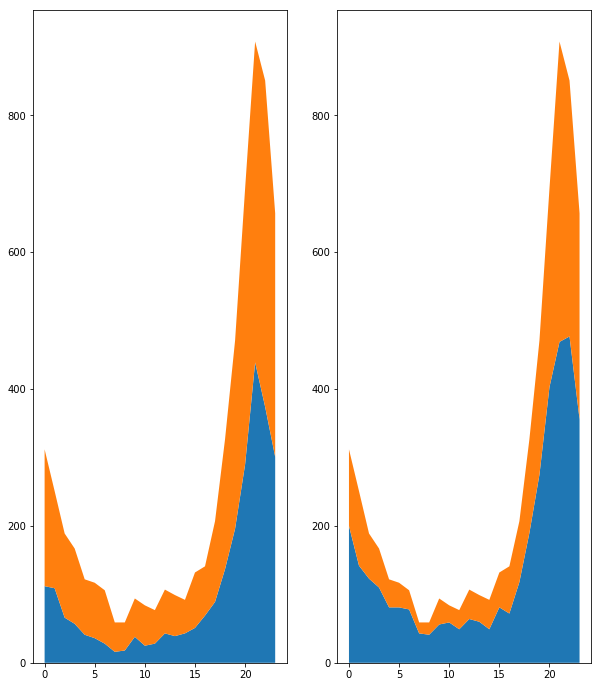

In [133]:
plt.subplot(121)
plt.stackplot(np.arange(24), illinois_counts, texas_counts)
plt.subplot(122)
plt.stackplot(np.arange(24), texas_counts, illinois_counts)

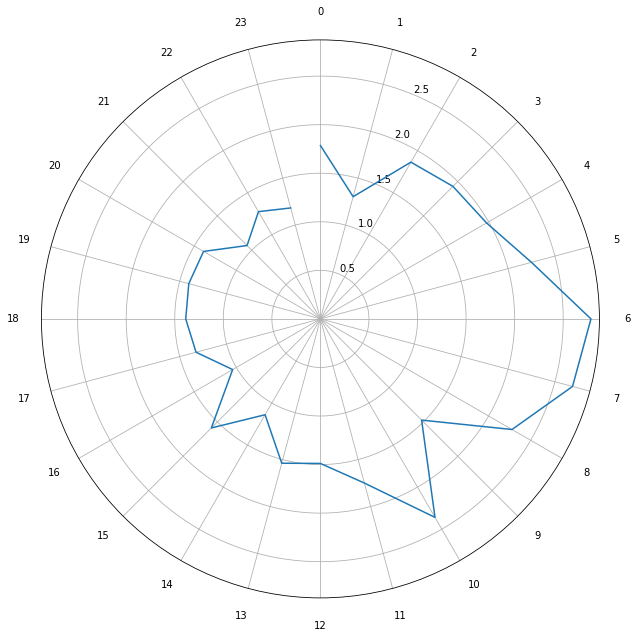

In [150]:
all_radians = np.arange(24) * 2*np.pi/24
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(all_radians, texas_counts/illinois_counts)
ax.set_xticks(all_radians)
ax.set_xticklabels([str(_) for _ in range(24)])
#ax.set_yticks([])


In [143]:
all_radians.size

24

In [144]:
texas_counts.size

24

In [147]:
texas_counts.index = np.arange(24)

In [151]:
illinois_counts.index = np.arange(24)

<Container object of 24 artists>

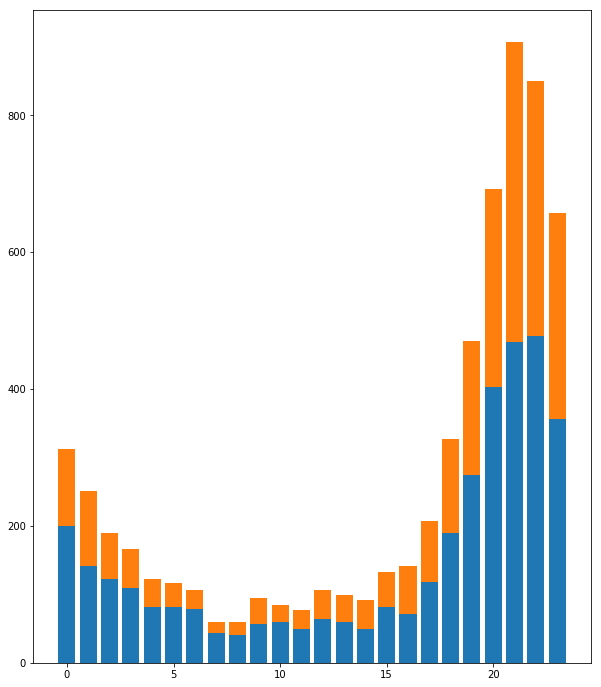

In [156]:
plt.bar(np.arange(24), texas_counts)
plt.bar(np.arange(24), illinois_counts, bottom=texas_counts)

In [157]:
import seaborn as sns

In [ ]:
plt.rcParams["figure.figsize"] = (12, 10)

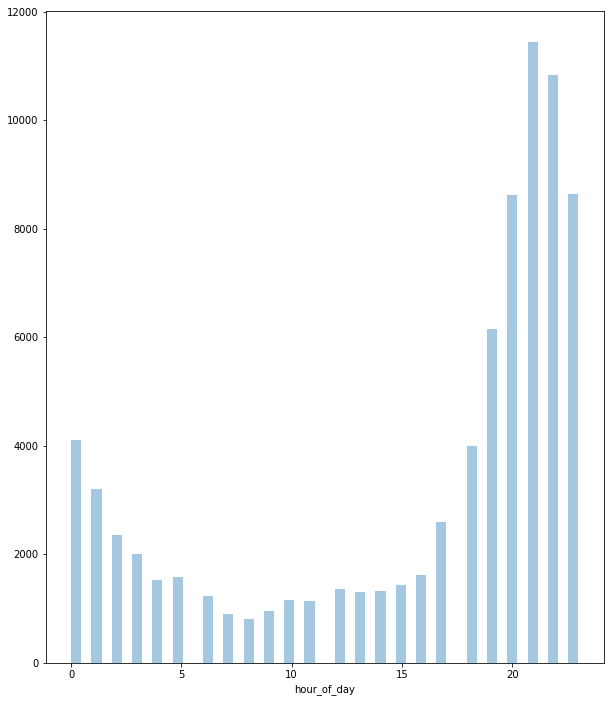

In [168]:
sns.distplot(ufo_dates["hour_of_day"], kde=False)

In [170]:
ufo_dates["month"] = ufo_dates.index.month

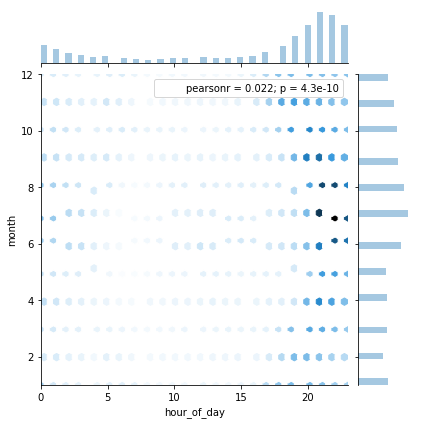

In [177]:
p = sns.jointplot(x="hour_of_day", y="month", data=ufo_dates, kind='hex', )

In [178]:
sns.jointplot?

In [183]:
ufo_dates["time"] = ufo_dates.index.time

In [185]:
ufo_dates["dayofyear"] = ufo_dates.index.dayofyear
ufo_date

In [191]:
ufo_dates["seconds_since_midnight"] = ufo_dates.hour_of_day * 3600 + ufo_dates.index.minute * 60 + ufo_dates.index.second

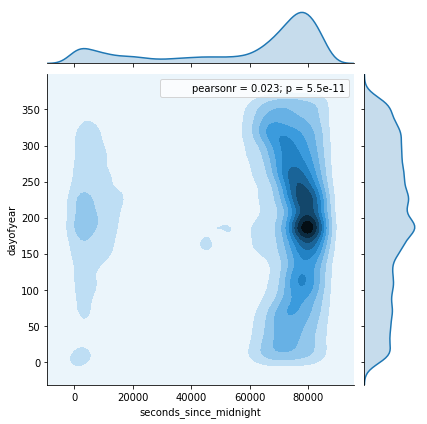

In [193]:
sns.jointplot(x="seconds_since_midnight", y="dayofyear", data = ufo_dates, kind="kde")

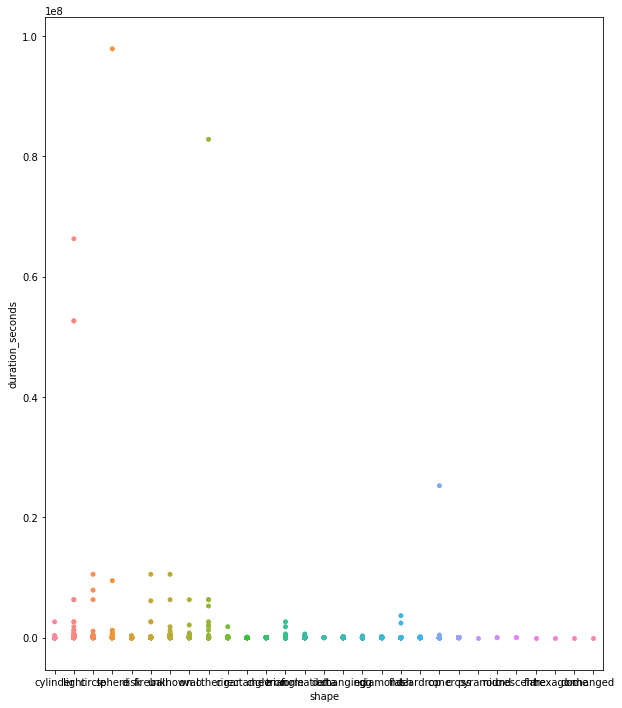

In [196]:
sns.stripplot(x="shape", y="duration_seconds", data=ufo_dates)

In [199]:
ufo_dates.groupby("shape")["state"].count()

shape
changed          1
changing      1819
chevron        912
cigar         1894
circle        6946
cone           277
crescent         2
cross          212
cylinder      1195
delta            7
diamond       1074
disk          4786
dome             1
egg            678
fireball      5825
flare            1
flash         1243
formation     2283
hexagon          1
light        15438
other         5184
oval          3446
pyramid          1
rectangle     1217
round            2
sphere        4989
teardrop       674
triangle      7395
unknown       5239
Name: state, dtype: int64

In [215]:
ufo_shapes = ufo_dates.set_index("shape")
ufo_shapes

,city,state,country,duration_seconds,duration_reported,description,report_date,latitude,longitude,hour_of_day,month,time,dayofyear,seconds_since_midnight
shape,,,,,,,,,,,,,,
cylinder,san marcos,tx,us,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,20,10,20:30:00,283,73800
light,lackland afb,tx,NaN,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,21,10,21:00:00,283,75600
circle,chester (uk/england),NaN,gb,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,17,10,17:00:00,283,61200
circle,edna,tx,us,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,21,10,21:00:00,284,75600
light,kaneohe,hi,us,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,20,10,20:00:00,284,72000
sphere,bristol,tn,us,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,19,10,19:00:00,283,68400
circle,penarth (uk/wales),NaN,gb,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,21,10,21:00:00,283,75600
disk,norwalk,ct,us,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333,23,10,23:45:00,283,85500
disk,pell city,al,us,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,2009-03-19,33.586111,-86.286111,20,10,20:00:00,283,72000


In [217]:
ufo_shapes.sort_index(inplace=True)

In [219]:
ufo_shapes.index.

Index([  'changed',  'changing',   'chevron',     'cigar',    'circle',
            'cone',  'crescent',     'cross',  'cylinder',     'delta',
         'diamond',      'disk',      'dome',       'egg',  'fireball',
           'flare',     'flash', 'formation',   'hexagon',     'light',
           'other',      'oval',   'pyramid', 'rectangle',     'round',
          'sphere',  'teardrop',  'triangle',   'unknown',         nan],
      dtype='object', name='shape')